## 參考連結

1. [Hash Table：Intro(簡介)](http://alrightchiu.github.io/SecondRound/hash-tableintrojian-jie.html#series)
2. [Hash Table：Chaining](http://alrightchiu.github.io/SecondRound/hash-tablechaining.html)
3. [白話的Hash Table簡介](https://blog.techbridge.cc/2017/01/21/simple-hash-table-intro/)
4. [30-11 之資料庫層的核心 - 索引結構演化論 B+樹](https://ithelp.ithome.com.tw/articles/10221111)
5. [YouTube - Hash Tables and Hash Functions](https://www.youtube.com/watch?v=KyUTuwz_b7Q)
6. [自己寫的Linkedlist](https://github.com/mandy331/Data-Structure_PythonNote/blob/master/Week1/Linkedlist.ipynb)


## 安裝套件

1. [Hash - PyCryptodome](https://pycryptodome.readthedocs.io/en/latest/src/introduction.html)

## Hash Table Introduction

Hash Table又稱做雜湊表，是一種儲存資料的方式。


當查找資料時：
- 以BinarySearchTree為例，BST的時間複雜度為O(logN)
- 而HashTable卻可以只用O(1)的時間就完成查找。
主要是因為Hash Table利用Hash Function先將資料進行轉換，並放入相對應的位置，使得查找變的相對快速很多，而不像BST的二分搜尋法需耗費O(logN)的時間。


Hash Table的目標在於以O(1)的時間完成新增、刪除、查詢三個動作，而說到查詢，Array就被提出來，因為可以利用index當成Array的key，進而找到對應的Value，而這樣的Array被稱為Direct Access Table。


但是事情沒有這麼簡單，Direct Access Table會一個大缺點：當Key值很大的時候，會把Array拉得很長，但有不是每個index都有值，很浪費記憶體空間。所以Hash Table誕生了，目標是希望可以將「Table的大小」（可以想像成Array的長度）逼近「實際儲存進Table的資料數量」(實際的Key的數量)，
於是又蹦出了Hash Function來達到這個目標，讓經過HashFunction的Key能夠符合Table的大小，由此可知，Table的大小如果可以預設的話是很重要的！！


然後當利用Hash Function來減少記憶體空間浪費的同時，也產生另一個問題叫做Collision，指的是經過Hash Function後，很有可能兩筆資料方在同一個位置上，導致查詢失敗，而要解決這個問題，有兩個方式：

- Chaining : 利用Linkedlist來串連同一個位置的資料。（本次使用的方式）
- OpenDressing : 尋找Table中「空的slot」存放資料。

Chaining指的是將原本一個位置只能儲存一筆資料變成一個位置能以Linkedlist的方式儲存多筆資料來解決Collision的問題。

## Hash Function Introduction

Hash Function用來加密Key，把資料儲存到HashKey的箱子。
把Hash Function想像成密碼鎖的話，HashKey就是鎖資料的保險箱。

而Hash Function應符合兩個條件：
1. HashKey的範圍應小於Table的大小，不能比箱子總數還大。
2. 好的Hash Function應該要能讓HashKey是平均分佈的，減少不同筆資料位於同一個箱子的情況，不過這部分可用Chaining或OpenDressing解決。

在我參考的文章中，講解了兩個基本的Hash Function，分別是：
1. Division Method: 有預設Table的大小，會比較快。（這次使用的方式）
2. Multiplication Method: 沒有預設Table的大小，會比較慢。

這次Hash Table是使用Division Method，而Table大小為預知，又要讓Hash Function符合上面兩個條件，於是mod就是最直覺的方式啦！

我們這次使用PyCryptodome套件的MD5來加密，先將Input的Key經過MD5後變成了16進位的編碼，然而16進位的編碼含有英文，所以需再轉換成10進位，才能取mod，得到hashKey，就能將資料放到相對應的箱子啦。

總結Hash Function是一個可以讓將Key進行加密後，得到HashKey來找到對應的箱子儲存資料，當之後不管是要新增、查詢、刪除資料，都只要透過HashKey就能一次找到箱子，所以時間複雜度也就不像BST需要花費O(logN)的時間慢慢往下比對，而是只要花費O(1)的時間，就能找到箱子進而找到資料啦。

## Hash Table 真有這麼厲害嗎?

我研究到這後覺得Hash Table也太厲害了吧，既可以把「搜尋」、「新增」、「刪除」時間壓縮到O(1)，又可以用減少記憶體空間，那這樣子BST的二分搜尋法還有競爭力嗎? 

請教老師後，總結BST和Hash Table在實際應用上的優缺點：

1. BST寫入資料時是明碼，而Hash Table則是加密後寫入，而我原本比較的基準是「搜尋」、「新增」、「刪除」時間，沒有考慮到Hash Function加密所需花的時間，當資料量很大的時候，Hash Table所花的時間未必會比較少，而且要用BST還是Hash Table要考慮到實際資料儲存的方式和花費時間的取捨，所以BST不見得完全被Hash Table打垮。

2. 由BST和Hash Table來思考現在資料儲存的現況，關聯式資料庫主要是用BST概念的二分搜尋法，優點是明碼儲存又可以用O(logN)指數級的時間搜尋資料，而Hash Table的Hash Function則是現行區塊鏈一定會用到的技術，利用Hash Function得到HashKey進而找到存放的箱子（區塊鏈的說法是區塊），優點是可以節省「搜尋」、「新增」、「刪除」的時間但是相對也要付出Hash Function的時間，以及可以保帳資料的安全性。

## 流程圖

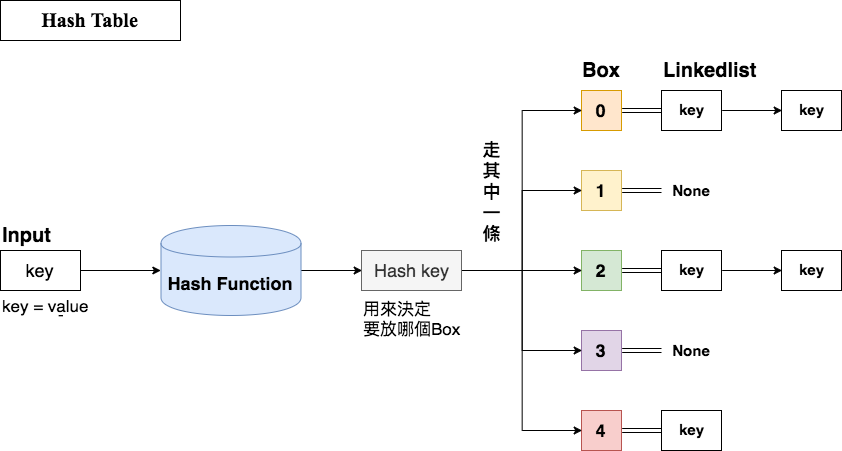

In [1]:
from IPython.display import Image
Image(filename = "HashTable.png", height = 1000, width = 1500)

## 程式碼

這是週二Pair-programming寫的HashTable，那時候還對Hash Table不夠熟悉，也想得不夠仔細，所以在預設Hash Table時就把Linkedlist指定為每個箱子的預設值，意思就是每個箱子都準備好插槽了哈哈哈。

In [2]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        
class LinkedList:
    def __init__(self, val = None):
        self.head = ListNode(val) 
        self.length = 0
        
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity # 幾個箱子
        self.data = [LinkedList()] * capacity # 每個箱子放入value
    
    def hash_function(self, key):
        return key % capacity
    
    def add(self, key):
        add_node = ListNode(key)
        list_ = self.data[self.hash_function(key)]
        if list_.head.val == None:
            list_.head = add_node
            list_.length += 1
        else:
            cur = list_.head
            for i in range(list_.length-1):
                cur = cur.next
            cur.next = add_node
            list_.length += 1
    
    def remove(self, key):
        list_ = self.data[self.hash_function(key)]        
        if list_.head.val == None: #length == 0
            print('No node in the list.')
            return None
        
        cur = list_.head
        size = list_.length
        for i in range(list_.length-2):
            if cur.next:
                if cur.next.val == key:
                    cur.next = cur.next.next
                    size -= 1
            cur = cur.next
        list_.length = size
        
        if list_.head.val == key:
            list_.head = list_.head.next
            list_.length -= 1
                               
    def contains(self, key):
        list_ = self.data[self.hash_function(key)]
        
        if list_.head.val == None: #length == 0
            print('No node in the list.')
            return False
        
        cur = list_.head
        for i in range(list_.length-1):
            if cur.val == key:
                return True
            else:
                cur = cur.next
        return False
            
        
        
capacity = 5
obj = MyHashSet(capacity)
obj.add(12)
obj.add(7)
obj.add(12)
obj.add(17)
obj.add(22)
obj.add(12)
print(obj.data[2].head.val)
obj.remove(12)
print(obj.contains(17))
print(obj.data[1].head.val)

12
True
7


那時候很開心的以為自己寫完了，初步Print出來結果也都對，結果再做檢查的時候發現我把每個箱子裡的Linkedlist都改掉了，所以會有問題，那個時候思慮不周，重新思考過後，問題出在我Linkedlist的新增、刪除、查詢不應該寫在Hash Table內，而是寫在Linkedlist內，才能做單一箱子內的Linkedlist資料的增減或查詢，而不影響到其他箱子內的資料。

## 釐清我對Hash Table的想法：

1. 釐清本次的Key == Value。
2. 我的Hash Table要含有以下幾個元素：
    + Table的大小: 預設要有幾個箱子。
    + Linkedlist: 每個箱子裡只要儲存大於等於1筆資料，都要用Linkedlist儲存。
    + Node: 儲存每一筆資料。
3. Hash Table的功能:
    + Hash Function: 將Key加密，才能知道要放在哪個箱子進而查找，這此使用的是MD5的Function，要先將輸入的Key轉成MD5的16進位編碼，再轉成10進位，得到HashKey和Table大小的Mod後，找到第Mod的箱子。
    + 新增資料add: 新增資料到Hash Table，
        + 先透過Hash Function產出的HashKey去找到對應的箱子。
        + 判斷箱子內有沒有資料:
            + 有資料: 代表是Linkedlist的形式，利用Linkedlist的加在尾巴的Function新增資料。
            + 沒資料: 新增Linkedlist並且Linkedlist.head為key。
        + 最後把更新的Linkedlist取代掉原本箱子內的東西。
    + 刪除資料remove: 刪除Hash Table裡的資料，
        + 一樣先透過Hash Function產出的HashKey去找到對應的箱子。
        + 判斷箱子內有沒有資料:
            + 有資料: 代表是Linkedlist的形式，在Linkedlist中加入遍歷的Function，只要符合Key，就把index記錄下來，再一筆筆用delete的Function刪掉。
            + 沒資料: 回傳 None
        + 最後把更新的Linkedlist取代掉原本箱子內的東西。
    + 查詢資料contains: 查詢Hash Table裡是否有該筆資料，
        + 先透過Hash Function產出的HashKey去找到對應的箱子。
        + 判斷箱子內有沒有資料:
            + 有資料: 代表是Linkedlist的形式，利用Linkedlist的search的Function查找資料，原本寫過的linkedlist的Function是以Index去找值，並且返回value，但是現在要改成用Key去比對，所以只要有符合Key的，就返回True，遍訪後都沒有符合的就返回False。
            + 沒資料: 返回False。



## 修改版：


把以前寫過的Linkedlist的Code拿出來改，並且新增了Linkedlist內的多個Function，關於Linkedlist的寫法我思考了很久，到底是要寫在hash table裡還是獨立成Class，後來決定寫成獨立的Class，雖然助教的測值不會在import我的Linkedlist的Class，但是經過測試後，因為我的HashSet的Class有用到Linkedlist的Class，所以即使只import HashSet的Class，也不會有問題，所以我就放心寫成獨立的Class了。

In [3]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

class LinkedList:
    def __init__(self, val = None):
        self.head = ListNode(val) 
        self.length = 0
    
    # 新增開頭
    def addAtHead(self, val):
        addhead = ListNode(val)
        if self.length == 0:#linked-list開頭有設置虛Node，要以length為判斷依據
            self.head = addhead
            addhead.next = None
        
        else:
            addhead.next = self.head
            self.head = addhead
        self.length += 1
        
    # 新增結尾
    def addAtTail(self, val):
        addtail = ListNode(val)
        if self.length == 0: # 等於是加在開頭
            self.head = addtail
            addtail.next = None
        
        else:
            current = self.head
            for i in range(self.length - 1): # current為目前linked-list的最後一個
                current = current.next
            current.next = addtail
        self.length += 1
    
    # 為了刪除重複值，須將linkedlist從頭到尾掃描，得到重複值的index，再利用之前寫好delete的function一筆一筆刪掉。
    def search_index(self, val):
        duplicated = []
        current = self.head
        for i in range(self.length):
            if current.val == val:
                duplicated.append(i)
            current = current.next
        return duplicated
    
    # 刪除某一個node
    def delete(self, index): # 完全就是我以前寫好的，複製貼上哈哈哈
        if index >= self.length or index < 0:
            pass
        
        elif self.length >= 2 and index == self.length - 1:
            current = self.head
            for i in range(self.length - 2):
                current = current.next
            current.next = None
            self.length -= 1
            
        elif index == 0:
            if self.length == 1:
                self.head = None
            else:
                current = self.head
                self.head = current.next
            self.length -= 1
            
        else:
            current = self.head
            for i in range(index - 1):
                current = current.next
            current.next = current.next.next
            self.length -= 1
            
    
    #查詢
    def search(self, val):
        if self.length == 0 or self.head.val == None: # linkedlist的長度為0或不含值
            return False
        
        current = self.head 
        for i in range(self.length): # 走訪每個值，只要符合就回傳True
            if current.val == val:
                return True
            current = current.next
        return False
    
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        
    def MD5_Hash_Function(self, key):
        h = MD5.new()
        h.update(key.encode("utf-8"))
        h_10 = int(h.hexdigest(),16)
        return h_10 % self.capacity
    
    def print_linkedlist(self):
        print("****Start print****")
        for i in range(self.capacity):
            if self.data[i] != None:
                print("No.",i)
                print("Length:",self.data[i].length)
                current = self.data[i].head
                for k in range(self.data[i].length):
                    print(current.val)
                    current = current.next
            else:
                print("No.",i)
                print("Length:",0)
            print("****each_box****")
        
    def add(self, key):
        cur_box = self.data[self.MD5_Hash_Function(key)] # 加密Key後，找到要放的箱子
        if cur_box == None: # 當箱子內沒有資料時
            cur_box = LinkedList() # 在箱子內放入插槽
            cur_box.addAtHead(key) # 將資料加在linkedlist的頭
        else: # 當箱子內有資料時
            cur_box.addAtTail(key) # 將資料加在該箱子內的最後一個插槽
        self.data[self.MD5_Hash_Function(key)] = cur_box # 覆寫原本箱子內的資料
             
    def remove(self, key):
        cur_box = self.data[self.MD5_Hash_Function(key)] # 加密Key後，找到要刪的Key的箱子 
        
        if cur_box == None: # 箱子內沒資料，直接返回
            return 
        
        else: # 箱子內有資料
            duplicated = cur_box.search_index(key) # 先找到重複值在linkedlist的位置，回傳的是一個list
            for i in range(len(duplicated)): 
                k = len(duplicated) - 1 - i # list中的index會由小到大排序，但是刪除的時候要由後往前刪
                cur_box.delete(duplicated[k]) # 依序刪除每一個筆
            
            if cur_box.length == 0: # 如果刪完資料的linkedlist長度為1，則拔除該箱子的插槽。
                cur_box = None
            
            self.data[self.MD5_Hash_Function(key)] = cur_box # 覆寫原本箱子內的資料
        
    def contains(self, key):
        cur_box = self.data[self.MD5_Hash_Function(key)] # 加密Key後，找到要該Key的箱子 
        if cur_box == None: # 箱子內沒資料，返回False
            return False
        else: # 箱子內有資料
            return cur_box.search(key)
        
        

from Crypto.Hash import MD5
#h = MD5.new() # MD5物件
#h.update("dog".encode("utf-8"))
#print(h.hexdigest())
#print(int(h.hexdigest(),16))
hashSet = MyHashSet(2)
hashSet.add("dog")
hashSet.add("pig")
hashSet.add("cat")
hashSet.add("cat")
rel = hashSet.contains("pig")
print(rel) 
rel = hashSet.contains("dog")
print(rel)
rel = hashSet.contains("cat")
print(rel)
hashSet.remove("cat")
rel = hashSet.contains("cat")
print(rel)
hashSet.add("bird")
rel = hashSet.contains("bird")
print(rel)
hashSet.remove("pig")
rel = hashSet.contains("pig")
print(rel)
hashSet.add("panda")
hashSet.add("panda")
rel = hashSet.contains("panda")
print(rel)
hashSet.add("elephant")
hashSet.print_linkedlist()
hashSet.remove("elephant")
hashSet.print_linkedlist()

True
True
True
False
True
False
True
****Start print****
No. 0
Length: 2
panda
panda
****each_box****
No. 1
Length: 3
dog
bird
elephant
****each_box****
****Start print****
No. 0
Length: 2
panda
panda
****each_box****
No. 1
Length: 2
dog
bird
****each_box****


### 看起來應該是沒什麼問題了，謝謝助教耐心地看到這裡！

### 看完Error後，發現我明碼存進ListNode，所以改了一下，以下是修改版！

In [9]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

class LinkedList:
    def __init__(self, val = None):
        self.head = ListNode(val) 
        self.length = 0
    
    # 新增開頭
    def addAtHead(self, val):
        addhead = ListNode(val)
        if self.length == 0:#linked-list開頭有設置虛Node，要以length為判斷依據
            self.head = addhead
            addhead.next = None
        
        else:
            addhead.next = self.head
            self.head = addhead
        self.length += 1
        
    # 新增結尾
    def addAtTail(self, val):
        addtail = ListNode(val)
        if self.length == 0: # 等於是加在開頭
            self.head = addtail
            addtail.next = None
        
        else:
            current = self.head
            for i in range(self.length - 1): # current為目前linked-list的最後一個
                current = current.next
            current.next = addtail
        self.length += 1
    
    # 為了刪除重複值，須將linkedlist從頭到尾掃描，得到重複值的index，再利用之前寫好delete的function一筆一筆刪掉。
    def search_index(self, val):
        duplicated = []
        current = self.head
        for i in range(self.length):
            if current.val == val:
                duplicated.append(i)
            current = current.next
        return duplicated
    
    # 刪除某一個node
    def delete(self, index): # 完全就是我以前寫好的，複製貼上哈哈哈
        if index >= self.length or index < 0:
            pass
        
        elif self.length >= 2 and index == self.length - 1:
            current = self.head
            for i in range(self.length - 2):
                current = current.next
            current.next = None
            self.length -= 1
            
        elif index == 0:
            if self.length == 1:
                self.head = None
            else:
                current = self.head
                self.head = current.next
            self.length -= 1
            
        else:
            current = self.head
            for i in range(index - 1):
                current = current.next
            current.next = current.next.next
            self.length -= 1
            
    
    #查詢
    def search(self, val):
        if self.length == 0 or self.head.val == None: # linkedlist的長度為0或不含值
            return False
        
        current = self.head 
        for i in range(self.length): # 走訪每個值，只要符合就回傳True
            if current.val == val:
                return True
            current = current.next
        return False
    
class MyHashSet:
    def __init__(self, capacity):
        self.capacity = capacity
        self.data = [None] * capacity
        
    def MD5_Hash_Function(self, key):
        h = MD5.new()
        h.update(key.encode("utf-8"))
        h_10 = int(h.hexdigest(),16)
        return h_10 
    
    def print_linkedlist(self):
        print("****Start print****")
        for i in range(self.capacity):
            if self.data[i] != None:
                print("No.",i)
                print("Length:",self.data[i].length)
                current = self.data[i].head
                for k in range(self.data[i].length):
                    print(current.val)
                    current = current.next
            else:
                print("No.",i)
                print("Length:",0)
            print("****each_box****")
        
    def add(self, key):
        HashKey = self.MD5_Hash_Function(key)
        cur_box = self.data[HashKey%self.capacity] # 加密Key後，找到要放的箱子
        if cur_box == None: # 當箱子內沒有資料時
            cur_box = LinkedList() # 在箱子內放入插槽
            cur_box.addAtHead(HashKey) # 將資料加在linkedlist的頭
        else: # 當箱子內有資料時
            cur_box.addAtTail(HashKey) # 將資料加在該箱子內的最後一個插槽
        self.data[HashKey%self.capacity] = cur_box # 覆寫原本箱子內的資料
             
    def remove(self, key):
        HashKey = self.MD5_Hash_Function(key)
        cur_box = self.data[HashKey%self.capacity] # 加密Key後，找到要刪的Key的箱子 
        
        if cur_box == None: # 箱子內沒資料，直接返回
            return 
        
        else: # 箱子內有資料
            duplicated = cur_box.search_index(HashKey) # 先找到重複值在linkedlist的位置，回傳的是一個list
            for i in range(len(duplicated)): 
                k = len(duplicated) - 1 - i # list中的index會由小到大排序，但是刪除的時候要由後往前刪
                cur_box.delete(duplicated[k]) # 依序刪除每一個筆
            
            if cur_box.length == 0: # 如果刪完資料的linkedlist長度為1，則拔除該箱子的插槽。
                cur_box = None
            
            self.data[HashKey%self.capacity] = cur_box # 覆寫原本箱子內的資料
        
    def contains(self, key):
        HashKey = self.MD5_Hash_Function(key)
        cur_box = self.data[HashKey%self.capacity] # 加密Key後，找到要該Key的箱子 
        if cur_box == None: # 箱子內沒資料，返回False
            return False
        else: # 箱子內有資料
            return cur_box.search(HashKey)
        
        

from Crypto.Hash import MD5
#h = MD5.new() # MD5物件
#h.update("dog".encode("utf-8"))
#print(h.hexdigest())
#print(int(h.hexdigest(),16))
hashSet = MyHashSet(2)
hashSet.add("dog")
hashSet.add("pig")
hashSet.add("cat")
hashSet.add("cat")
rel = hashSet.contains("pig")
print(rel) 
rel = hashSet.contains("dog")
print(rel)
rel = hashSet.contains("cat")
print(rel)
# hashSet.print_linkedlist()
# print("======================")
hashSet.add("bird")
rel = hashSet.contains("bird")
print(rel)
hashSet.remove("pig")
rel = hashSet.contains("pig")
print(rel)
hashSet.add("panda")
hashSet.add("panda")
rel = hashSet.contains("panda")
print(rel)
hashSet.remove("panda")
rel = hashSet.contains("panda")
print(rel)
hashSet.remove("dog")
rel = hashSet.contains("dog")
print(rel)
# hashSet.print_linkedlist()
# print("======================")
# hashSet.add("dog")
# hashSet.remove("dog")
# hashSet.print_linkedlist()
# print("======================")
# hashSet.remove("panda")
# hashSet.print_linkedlist()
# print("======================")
# hashSet.remove("cat")
# hashSet.print_linkedlist()
# print("======================")


True
True
True
True
False
True
False
False
